##Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns 
import matplotlib.category
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##Data Loading

In [3]:
path="/content/gdrive/My Drive/BE Air Quality Monitoring/Implementation/Data Collection/delhi.csv"
df=pd.read_csv(path) 
print(df)

          Date  ...                                           pregnant
0     31-10-19  ...  The current level of air quality is likely to ...
1     31-10-19  ...  The current level of air quality is likely to ...
2     31-10-19  ...  The current level of air quality is likely to ...
3     01-11-19  ...  The current level of air quality is likely to ...
4     01-11-19  ...  The current level of air quality is likely to ...
...        ...  ...                                                ...
3962  25-04-20  ...  The current level of air quality is likely to ...
3963  25-04-20  ...  The current level of air quality is likely to ...
3964  25-04-20  ...  The current level of air quality is likely to ...
3965  25-04-20  ...  The current level of air quality is likely to ...
3966  26-04-20  ...  The current level of air quality is likely to ...

[3967 rows x 25 columns]


##Data Pre-processing

###Missing Values

In [4]:
search=np.nan
for cols in df.columns:
	if (search in df[cols]):
		print('Found in '+cols)

###Concatinating Date and time into one datatype called datetime

In [5]:
for ind in df.index:
	string=df['Date'][ind]
	string = string[:6]+"20"+string[6:]
	string = string[6:]+"-"+string[3:5]+"-"+string[0:2]
	dat=datetime.strptime(string,'%Y-%m-%d').date()
	time=datetime.strptime(df['Timestamp'][ind],'%H:%M:%S').time()
	timestamp = datetime.combine(dat,time)
	df['Date'][ind]=timestamp

print(df['Date'])
print()
type(df['Date'][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2019-10-31 21:00:00
1       2019-10-31 22:00:00
2       2019-10-31 23:00:00
3       2019-11-01 00:00:00
4       2019-11-01 01:00:00
               ...         
3962    2020-04-25 20:00:00
3963    2020-04-25 21:00:00
3964    2020-04-25 22:00:00
3965    2020-04-25 23:00:00
3966    2020-04-26 00:00:00
Name: Date, Length: 3967, dtype: object



datetime.datetime

##Data Visualisation

###CO

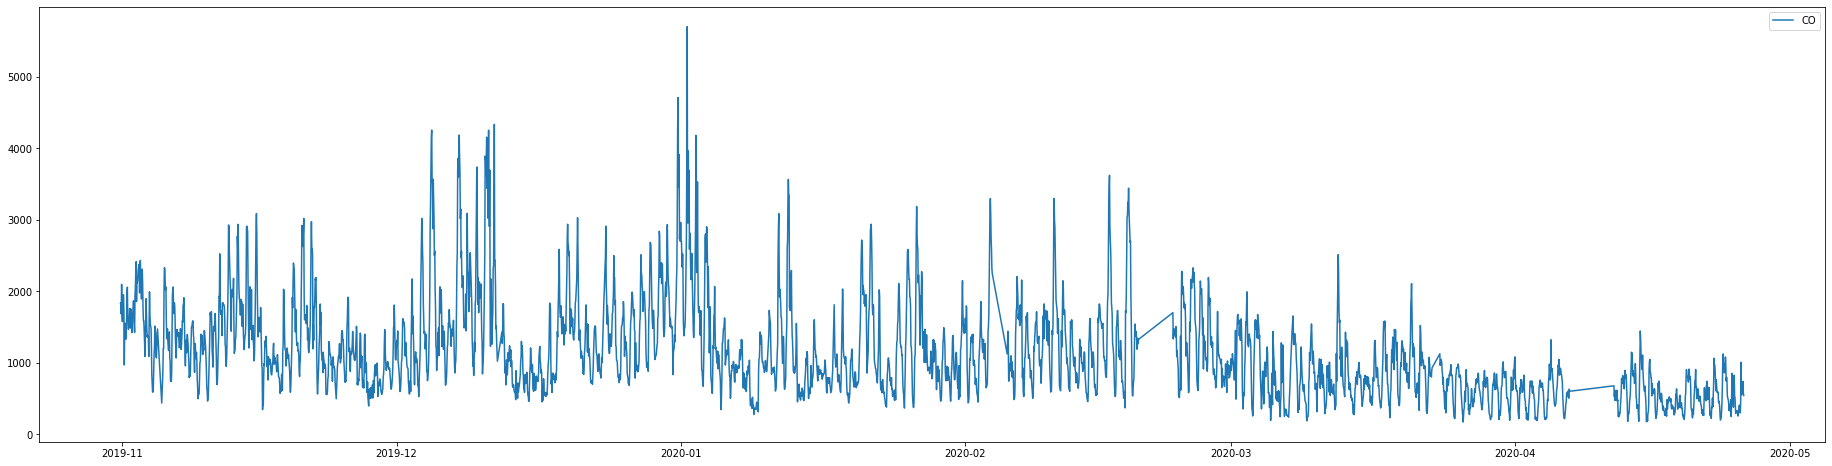

In [6]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['CO'],label='CO')
plt.legend()

###NO2

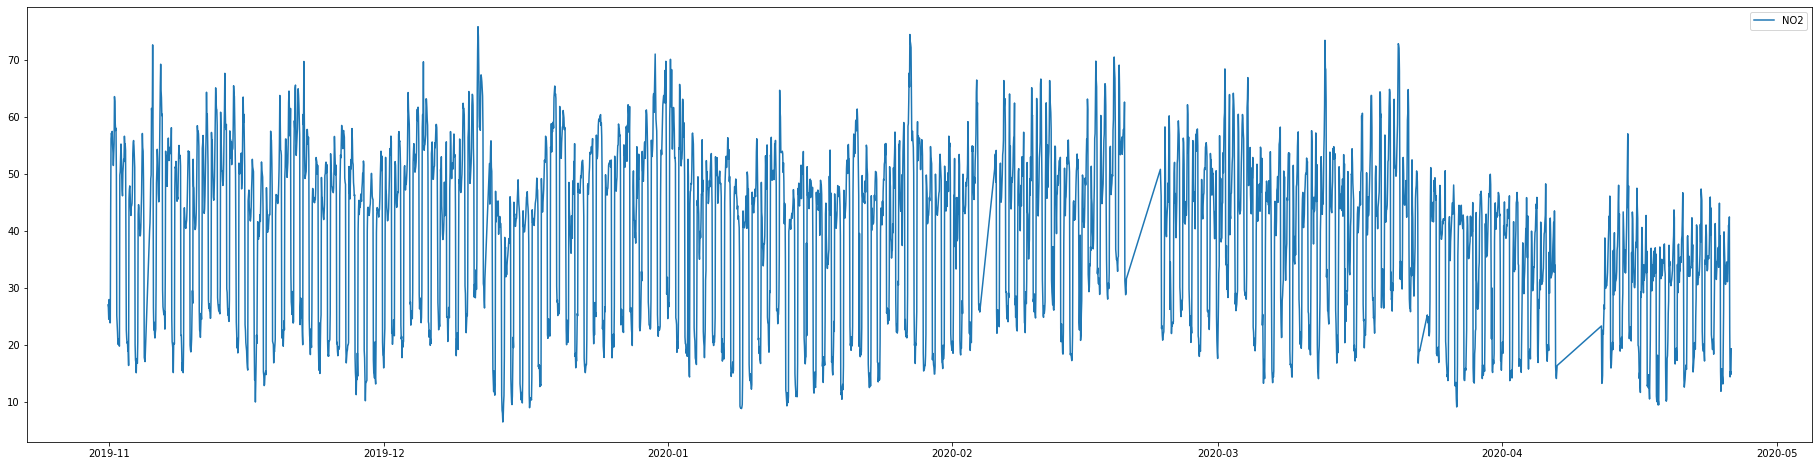

In [7]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['NO2'],label='NO2')
plt.legend()

###O3

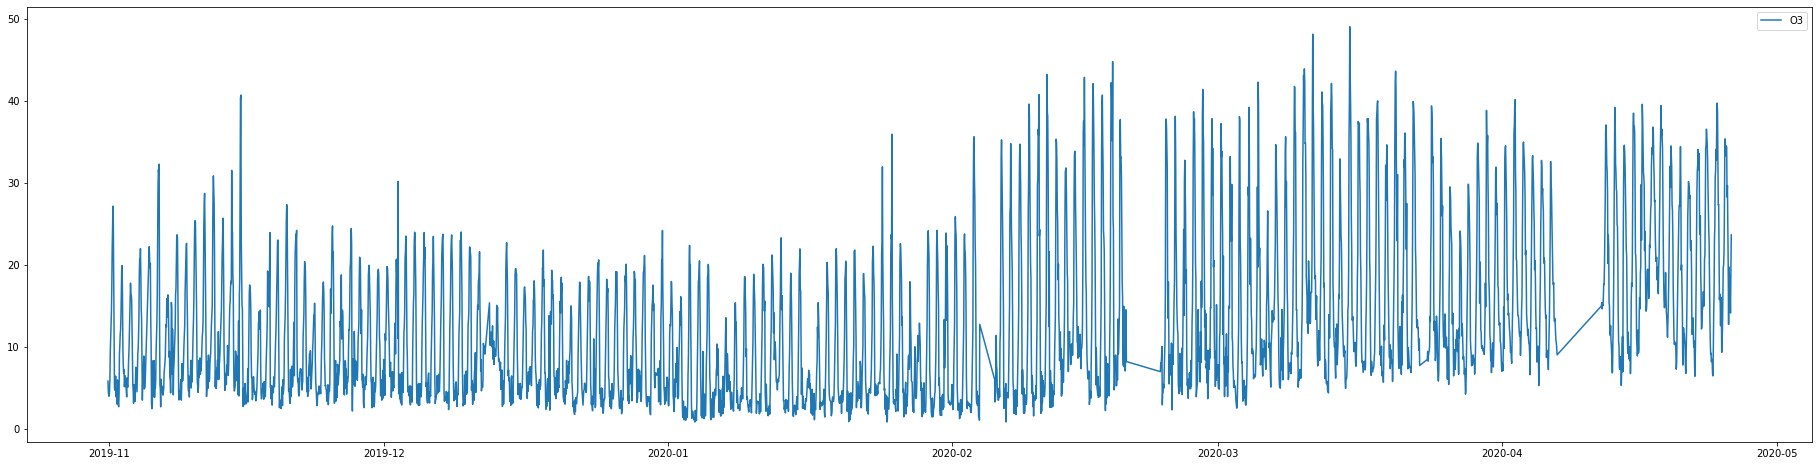

In [8]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['O3'],label='O3')
plt.legend()

###PM10

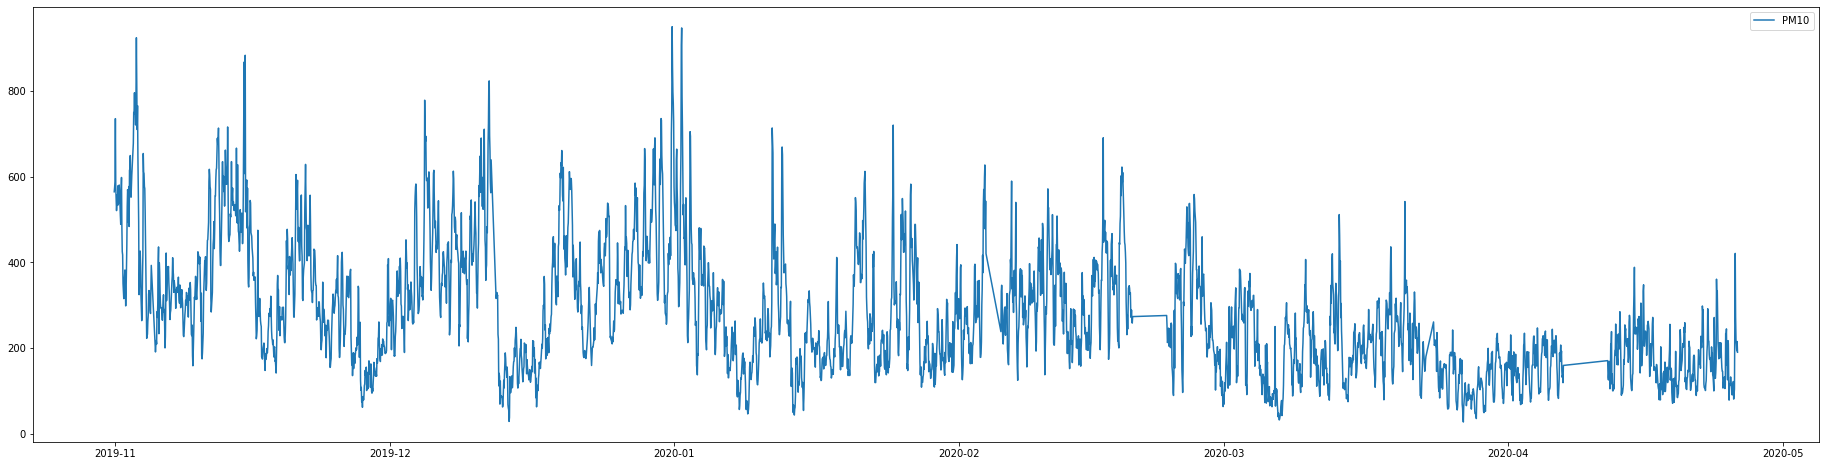

In [9]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM10'],label='PM10')
plt.legend()

###PM2.5

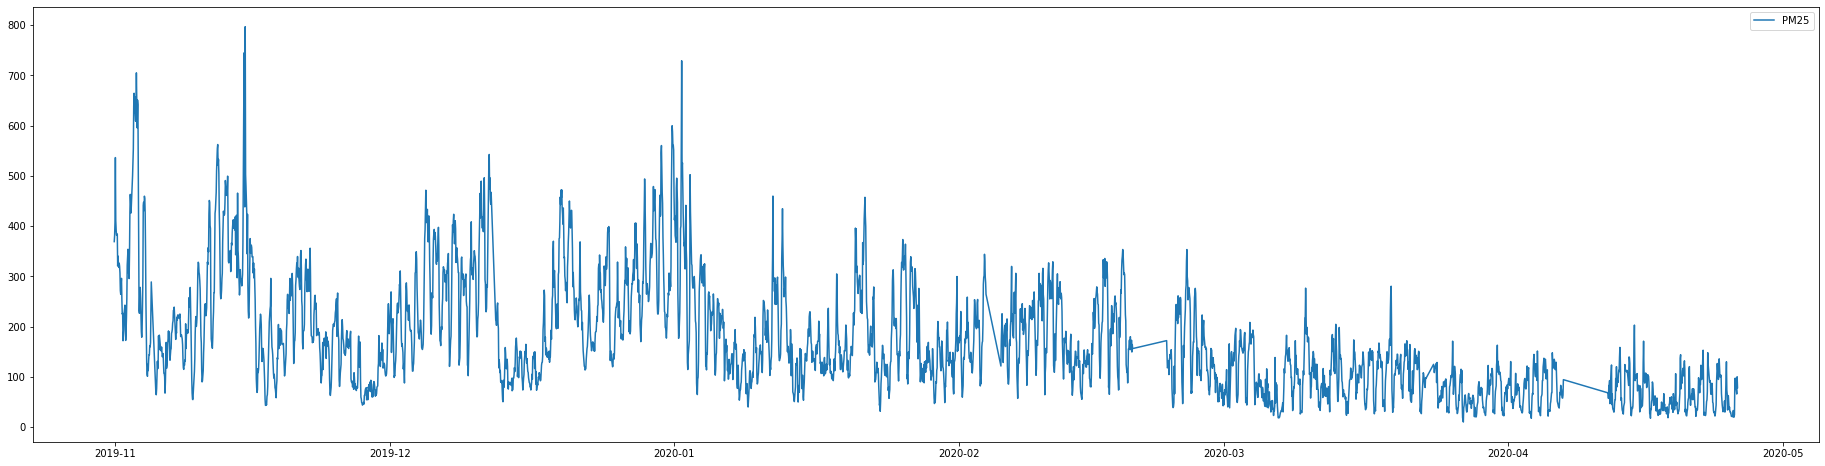

In [10]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM25'],label='PM25')
plt.legend()

###SO2

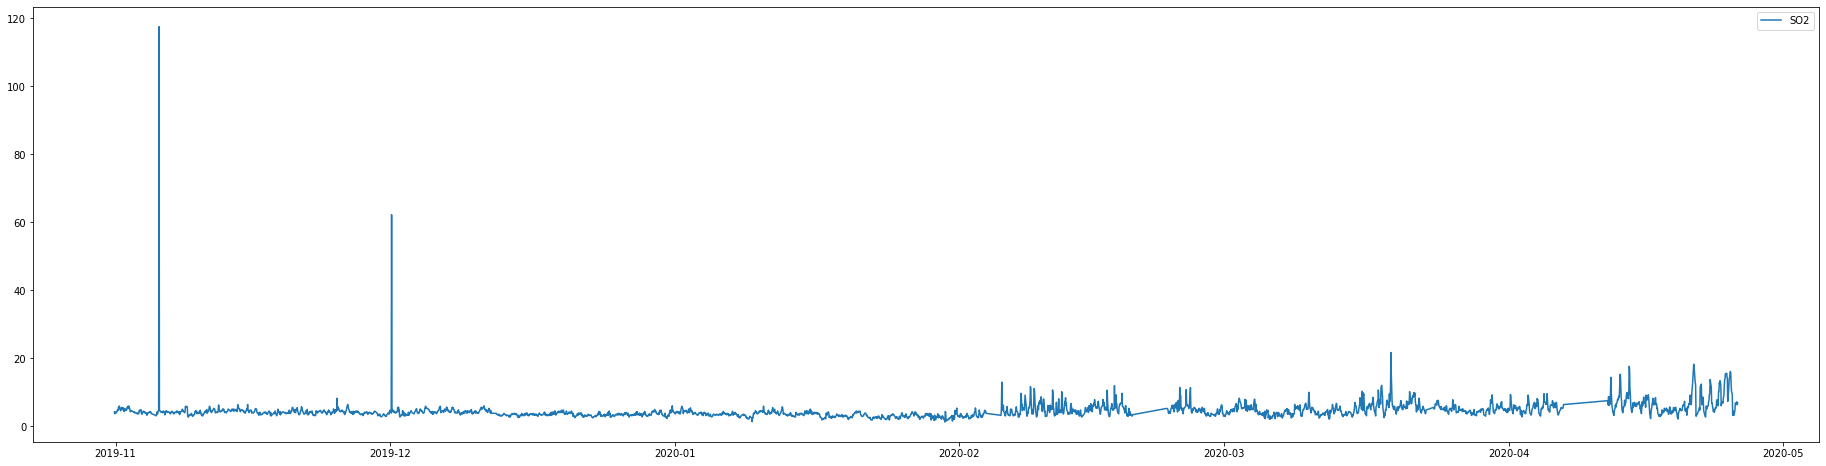

In [11]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['SO2'],label='SO2')
plt.legend()

##Outlier Analysis

###CO

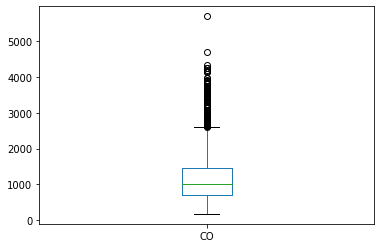

In [12]:
df['CO'].plot(kind='box')

In [13]:
Q1 = df['CO'].quantile(0.25)
Q3 = df['CO'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [14]:
j=0;
for i in df['CO']:
  if i < lower or i > upper:
    df.at[j,'CO']=(df.at[j-1,'CO'] + df.at[j+1,'CO'])/2
  
  j=j+1

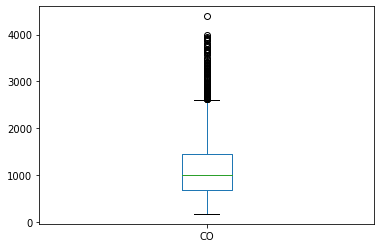

In [15]:
df['CO'].plot(kind='box')

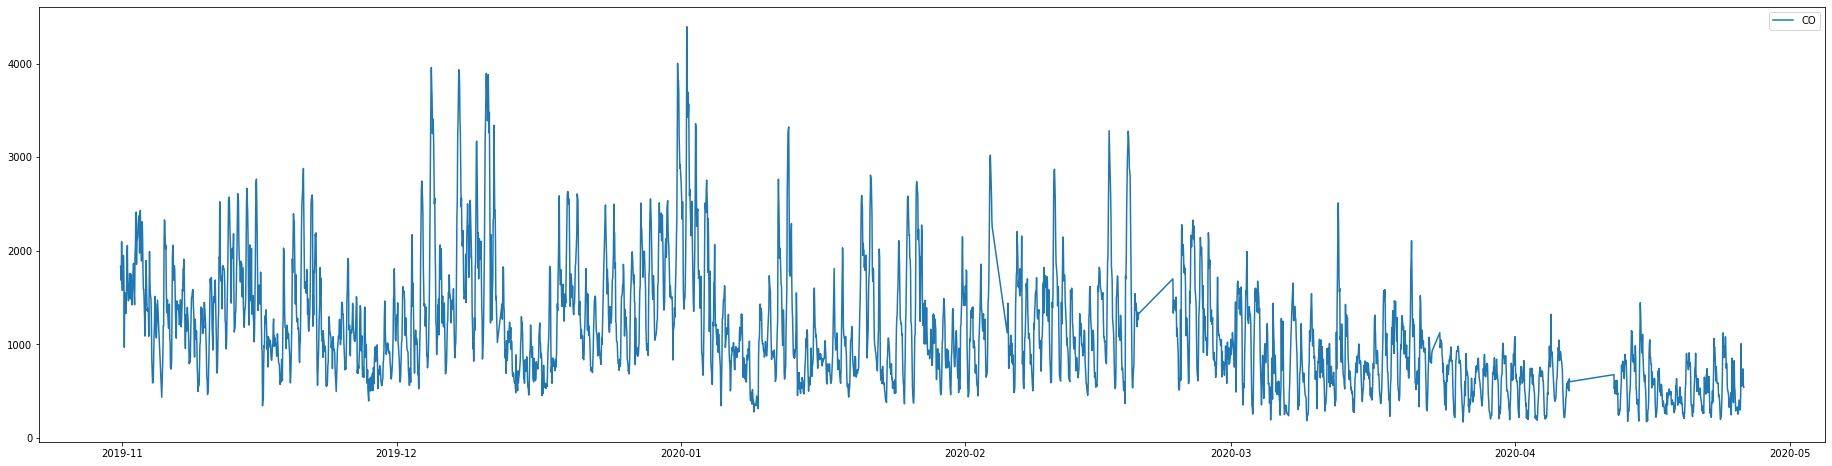

In [16]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['CO'],label='CO')
plt.legend()

###NO2

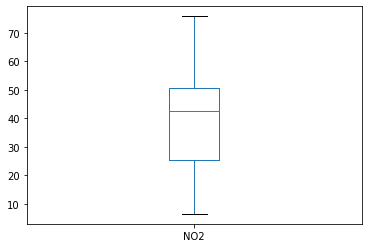

In [17]:
df['NO2'].plot(kind='box')

###O3

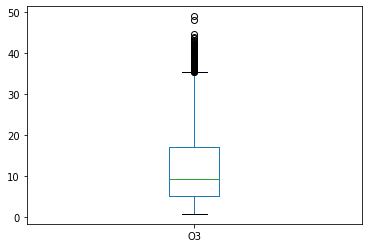

In [18]:
df['O3'].plot(kind='box')

In [19]:
Q1 = df['O3'].quantile(0.25)
Q3 = df['O3'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [20]:
j=0;
for i in df['O3']:
  if i < lower or i > upper:
    df.at[j,'O3']=(df.at[j-1,'O3'] + df.at[j+1,'O3'])/2
  
  j=j+1

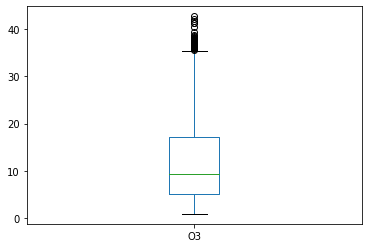

In [21]:
df['O3'].plot(kind='box')

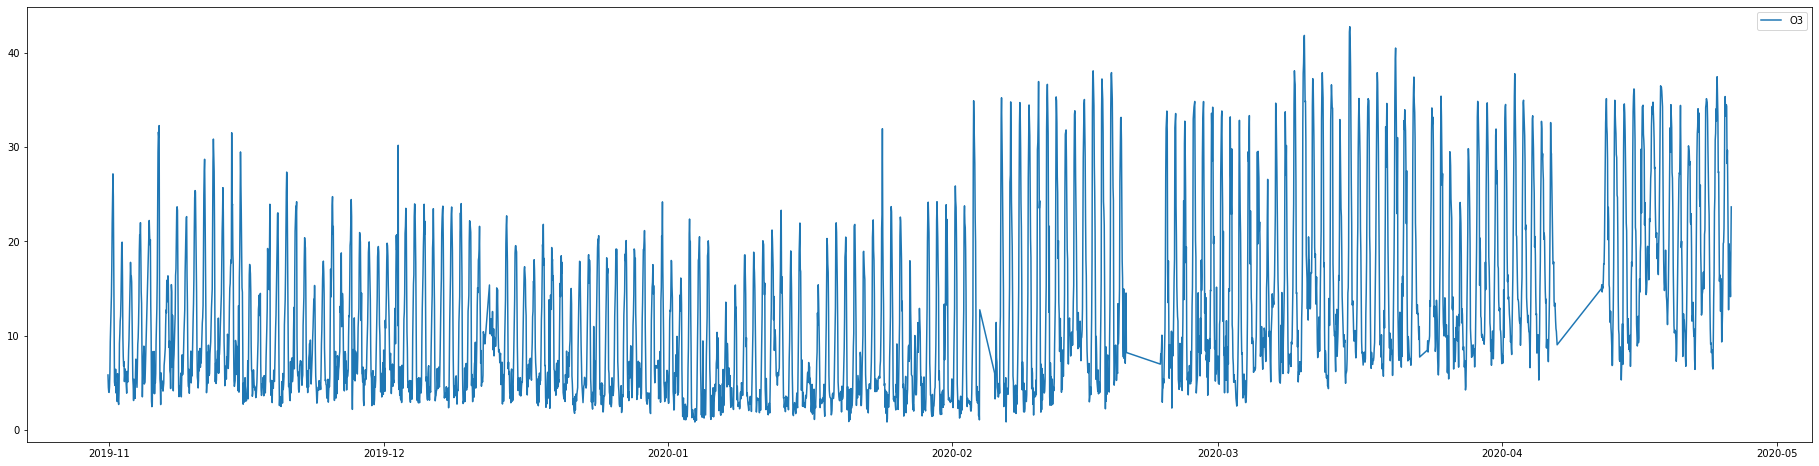

In [22]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['O3'],label='O3')
plt.legend()

###PM10

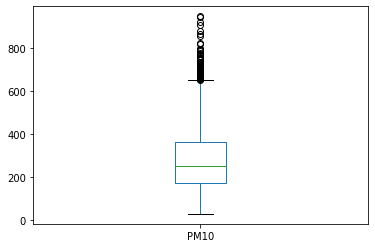

In [23]:
df['PM10'].plot(kind='box')

In [24]:
Q1 = df['PM10'].quantile(0.25)
Q3 = df['PM10'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [25]:
j=0;
for i in df['PM10']:
  if i < lower or i > upper:
    df.at[j,'PM10']=(df.at[j-1,'PM10'] + df.at[j+1,'PM10'])/2
  
  j=j+1

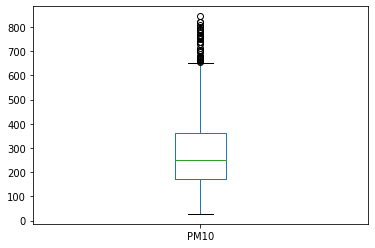

In [26]:
df['PM10'].plot(kind='box')

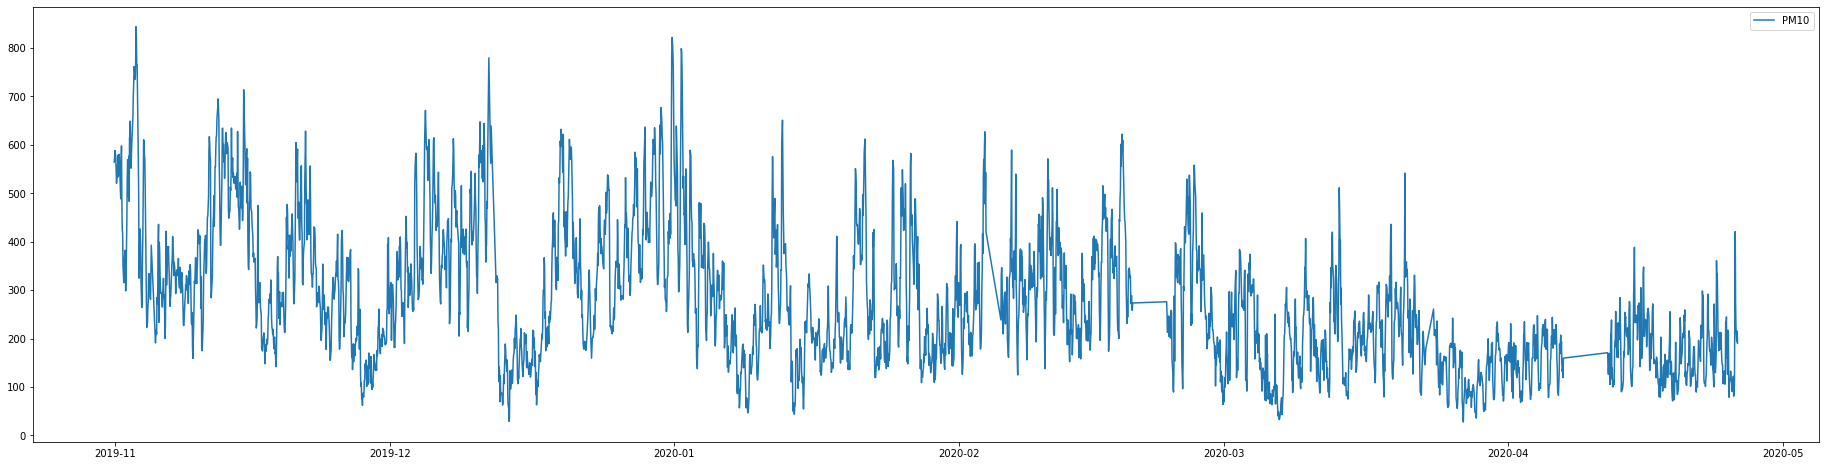

In [27]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM10'],label='PM10')
plt.legend()

###PM2.5

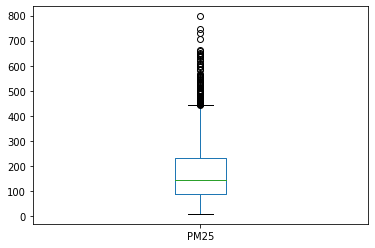

In [28]:
df['PM25'].plot(kind='box')

In [29]:
Q1 = df['PM25'].quantile(0.25)
Q3 = df['PM25'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [30]:
j=0;
for i in df['PM25']:
  if i < lower or i > upper:
    df.at[j,'PM25']=(df.at[j-1,'PM25'] + df.at[j+1,'PM25'])/2
  
  j=j+1

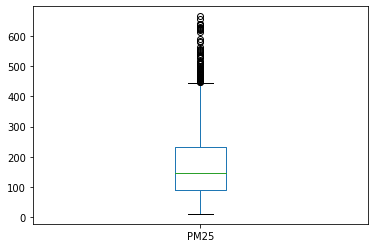

In [31]:
df['PM25'].plot(kind='box')

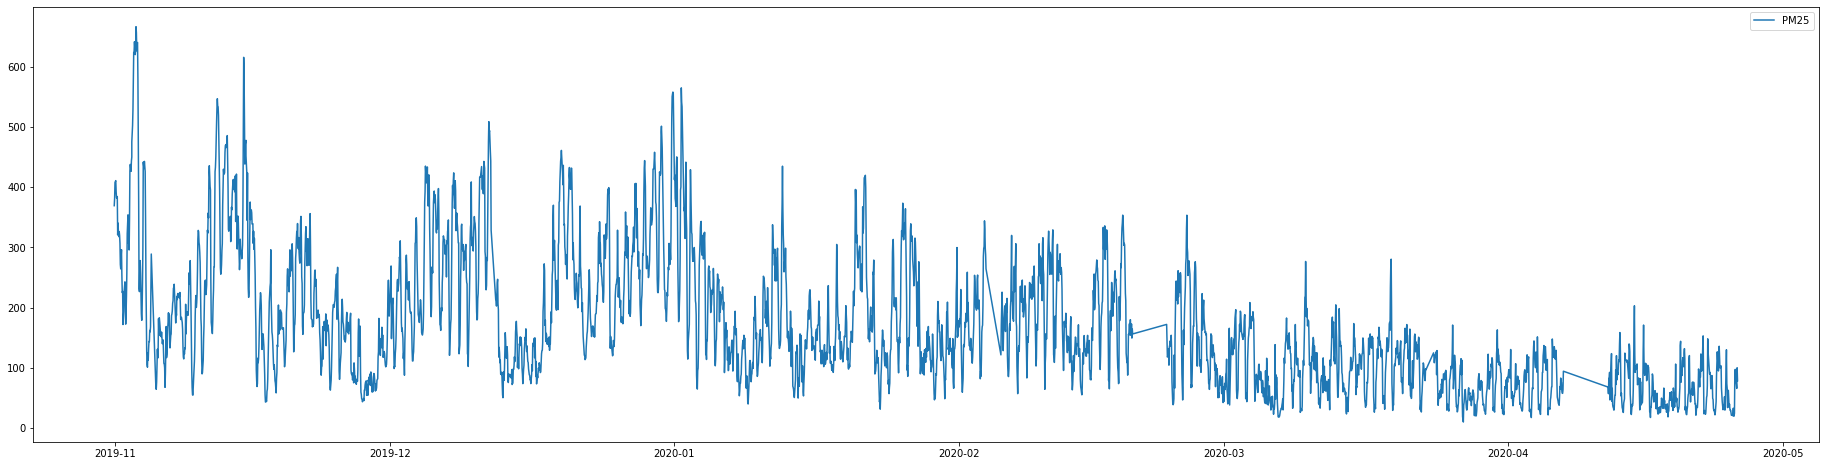

In [32]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM25'],label='PM25')
plt.legend()

###SO2

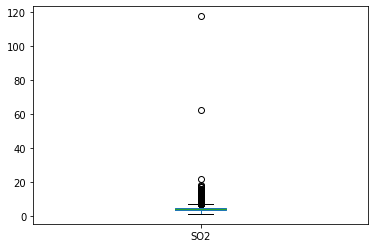

In [33]:
df['SO2'].plot(kind='box')

In [34]:
Q1 = df['SO2'].quantile(0.25)
Q3 = df['SO2'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [35]:
j=0;
for i in df['SO2']:
  if i < lower or i > upper:
    df.at[j,'SO2']=(df.at[j-1,'SO2'] + df.at[j+1,'SO2'])/2
  
  j=j+1

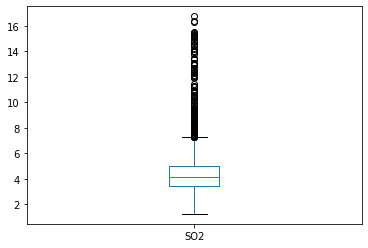

In [36]:
df['SO2'].plot(kind='box')

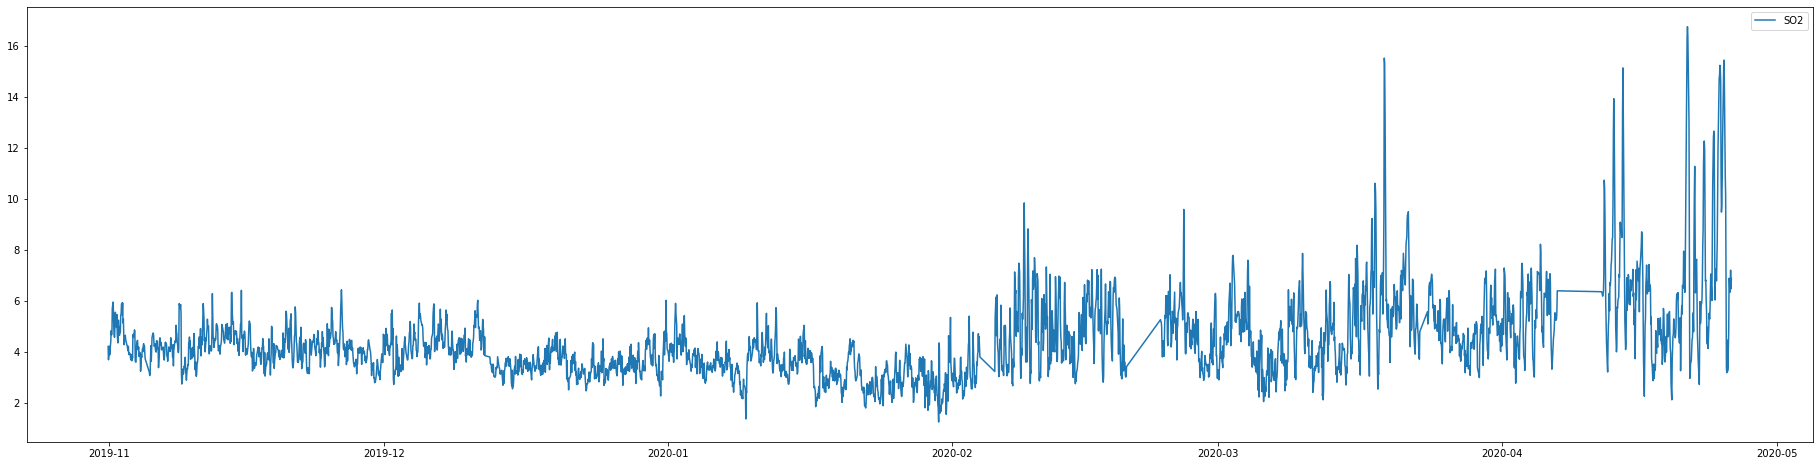

In [37]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['SO2'],label='SO2')
plt.legend()

##Data Transformation

###Smoothing

####CO

In [38]:
rolling = df['CO'].rolling(window=30)
rolling_mean = rolling.mean()

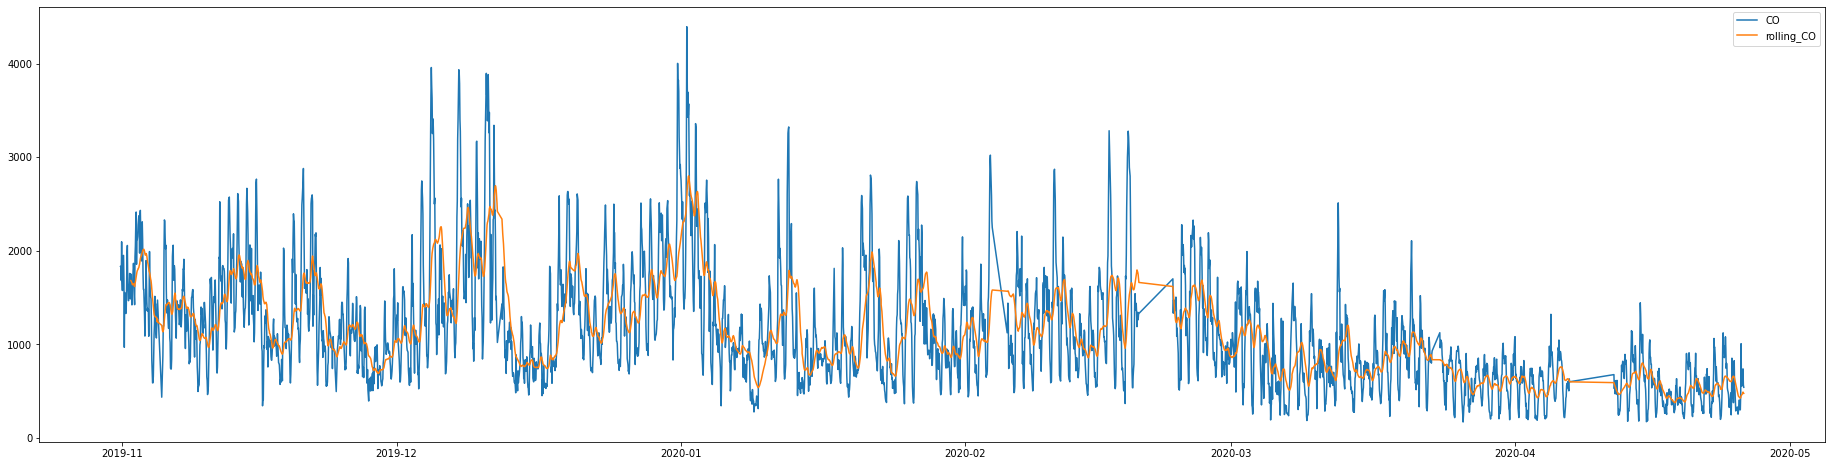

In [39]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['CO'],label='CO')
plt.plot(df['Date'],rolling_mean,label='rolling_CO')
plt.legend()

In [40]:
df['smooth_CO']=rolling_mean
df['smooth_CO']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3962    467.973000
3963    479.400000
3964    490.389000
3965    480.833667
3966    476.808667
Name: smooth_CO, Length: 3967, dtype: float64

####NO2

In [41]:
rolling = df['NO2'].rolling(window=30)
rolling_mean = rolling.mean()

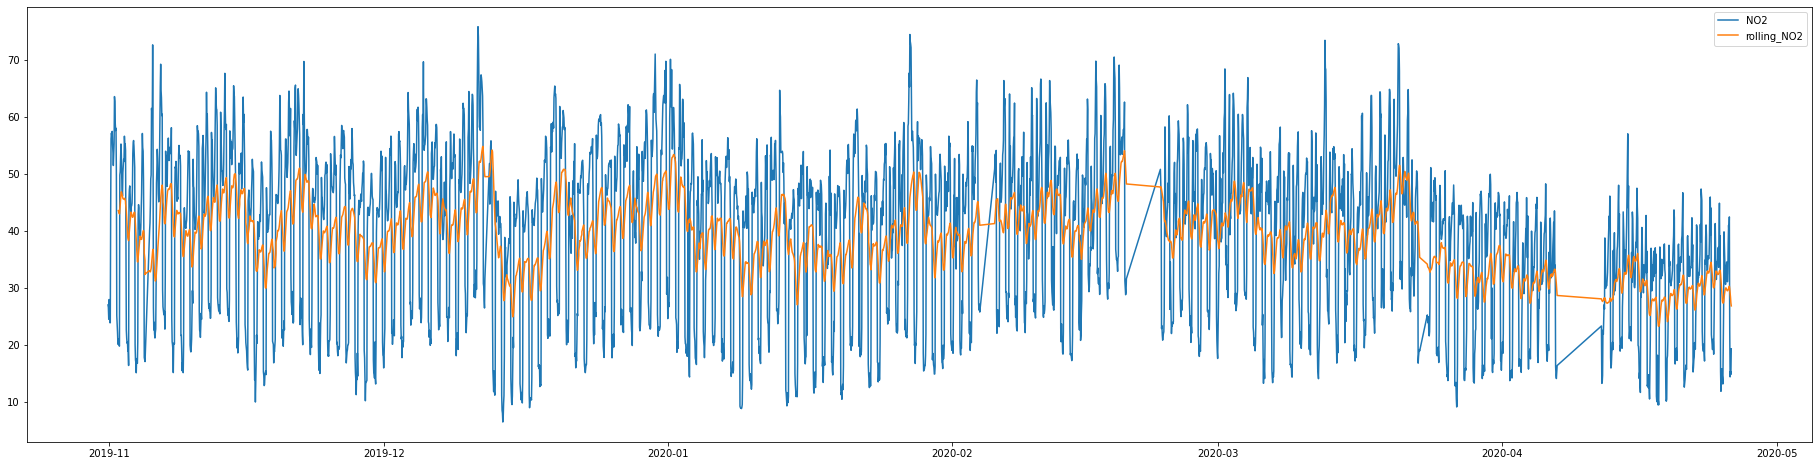

In [42]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['NO2'],label='NO2')
plt.plot(df['Date'],rolling_mean,label='rolling_NO2')
plt.legend()

In [43]:
df['smooth_NO2']=rolling_mean
df['smooth_NO2']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3962    29.761333
3963    29.120667
3964    28.318333
3965    27.317000
3966    26.794667
Name: smooth_NO2, Length: 3967, dtype: float64

####O3

In [44]:
rolling = df['O3'].rolling(window=30)
rolling_mean = rolling.mean()

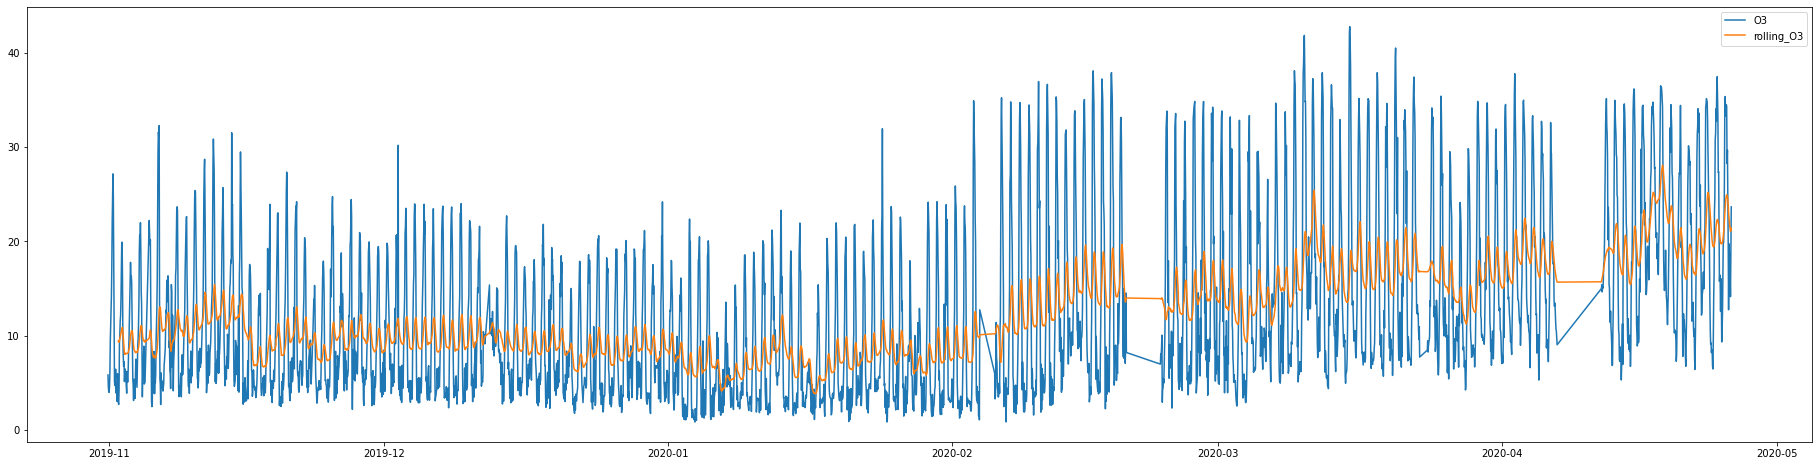

In [45]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['O3'],label='O3')
plt.plot(df['Date'],rolling_mean,label='rolling_O3')
plt.legend()

In [46]:
df['smooth_O3']=rolling_mean
df['smooth_O3']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3962    21.659333
3963    21.291667
3964    21.046667
3965    21.148000
3966    21.388333
Name: smooth_O3, Length: 3967, dtype: float64

####PM10

In [47]:
rolling = df['PM10'].rolling(window=30)
rolling_mean = rolling.mean()

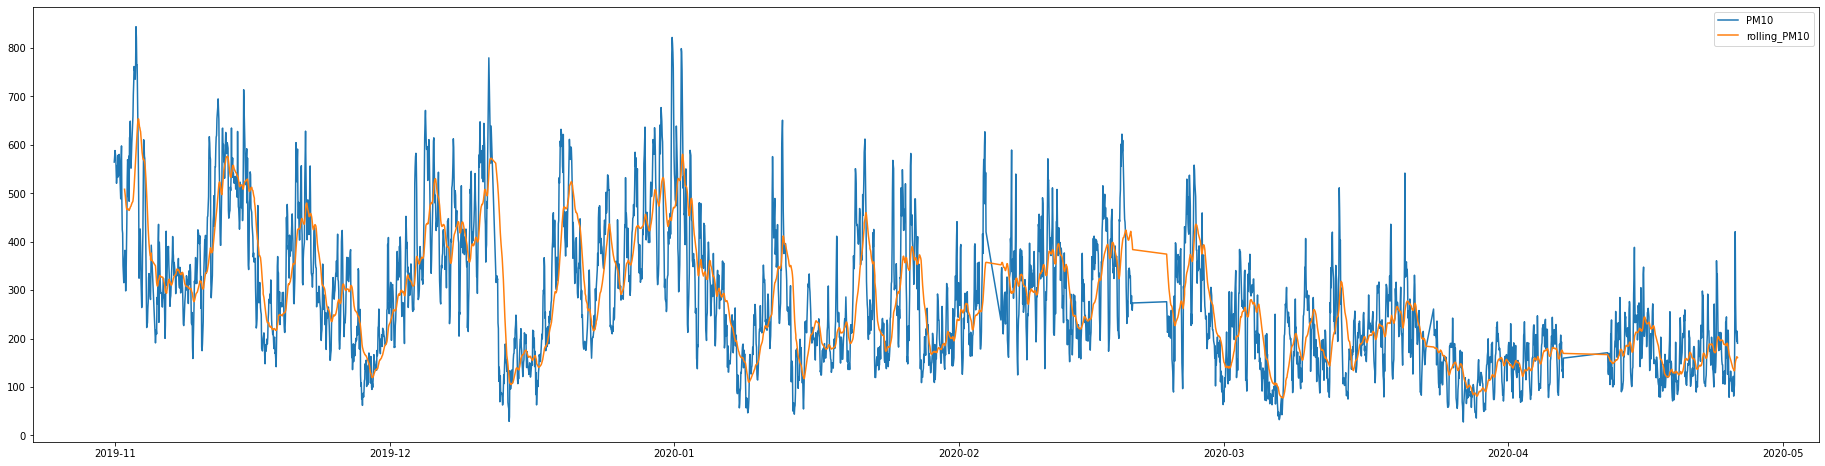

In [48]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM10'],label='PM10')
plt.plot(df['Date'],rolling_mean,label='rolling_PM10')
plt.legend()

In [49]:
df['smooth_PM10']=rolling_mean
df['smooth_PM10']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3962    156.328333
3963    159.776667
3964    162.435333
3965    161.820000
3966    160.547333
Name: smooth_PM10, Length: 3967, dtype: float64

####PM2.5

In [50]:
rolling = df['PM25'].rolling(window=30)
rolling_mean = rolling.mean()

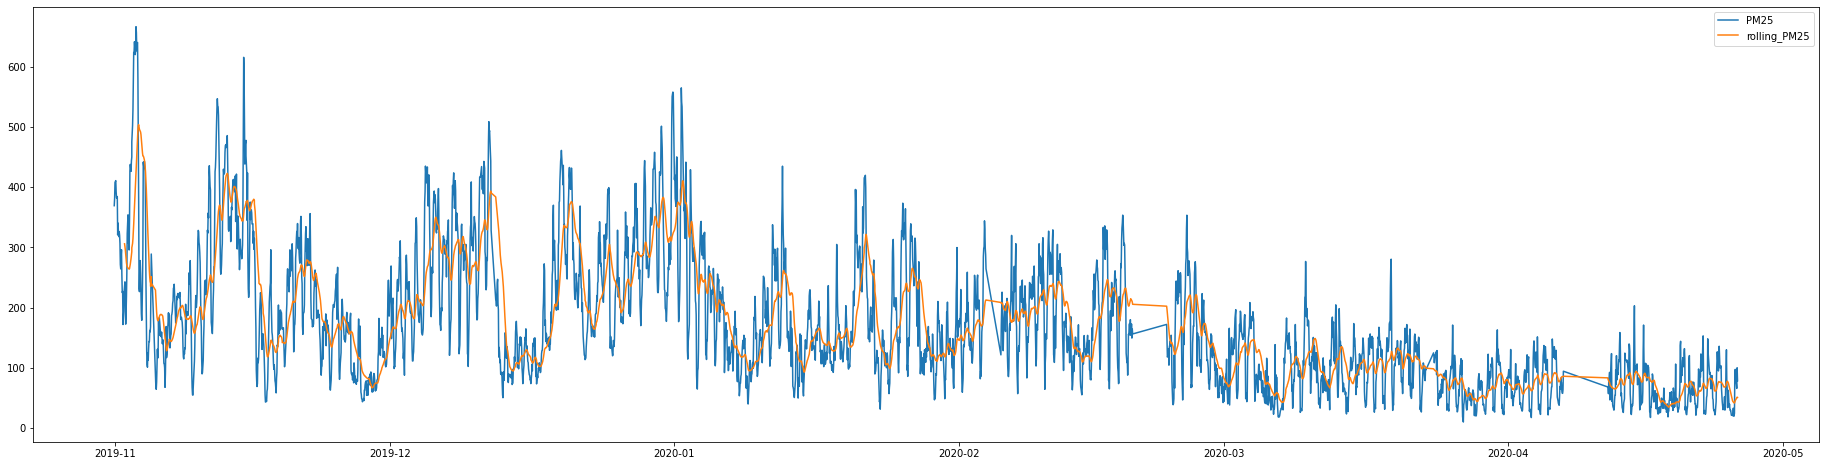

In [51]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['PM25'],label='PM25')
plt.plot(df['Date'],rolling_mean,label='rolling_PM25')
plt.legend()

In [52]:
df['smooth_PM25']=rolling_mean
df['smooth_PM25']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3962    47.589667
3963    49.032333
3964    49.998667
3965    51.142000
3966    50.772000
Name: smooth_PM25, Length: 3967, dtype: float64

####SO2

In [53]:
rolling = df['SO2'].rolling(window=30)
rolling_mean = rolling.mean()

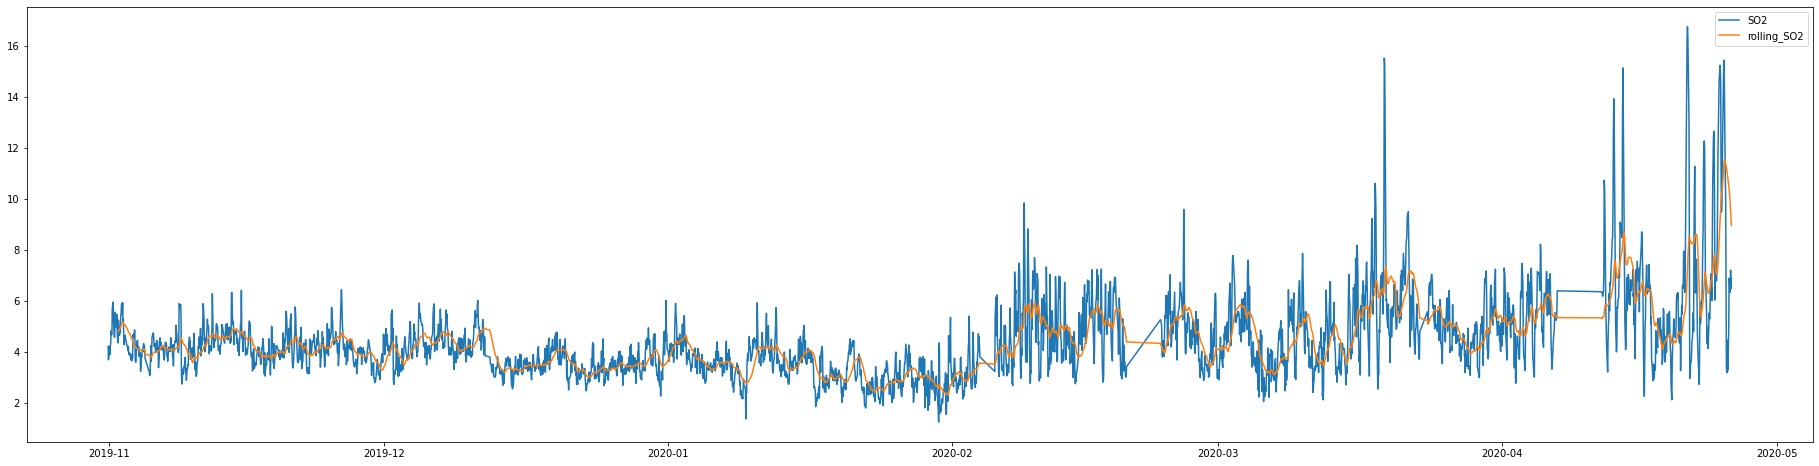

In [54]:
plt.figure(figsize=(32,8))
plt.plot(df['Date'],df['SO2'],label='SO2')
plt.plot(df['Date'],rolling_mean,label='rolling_SO2')
plt.legend()

In [55]:
df['smooth_SO2']=rolling_mean
df['smooth_SO2']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3962    10.022980
3963     9.772553
3964     9.522172
3965     9.243649
3966     8.965221
Name: smooth_SO2, Length: 3967, dtype: float64

###Z-score Normalisation

####CO

In [56]:
mean=df['smooth_CO'].mean()
std=df['smooth_CO'].std()
df['norm_CO']=(df['smooth_CO']-mean)/std
df['norm_CO']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962   -1.447004
3963   -1.422276
3964   -1.398496
3965   -1.419174
3966   -1.427884
Name: norm_CO, Length: 3967, dtype: float64

####NO2

In [57]:
mean=df['smooth_NO2'].mean()
std=df['smooth_NO2'].std()
df['norm_NO2']=(df['smooth_NO2']-mean)/std
df['norm_NO2']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962   -1.595208
3963   -1.704296
3964   -1.840911
3965   -2.011411
3966   -2.100350
Name: norm_NO2, Length: 3967, dtype: float64

####O3

In [58]:
mean=df['smooth_O3'].mean()
std=df['smooth_O3'].std()
df['norm_O3']=(df['smooth_O3']-mean)/std
df['norm_O3']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962    2.047071
3963    1.967579
3964    1.914609
3965    1.936517
3966    1.988479
Name: norm_O3, Length: 3967, dtype: float64

####PM10

In [59]:
mean=df['smooth_PM10'].mean()
std=df['smooth_PM10'].std()
df['norm_PM10']=(df['smooth_PM10']-mean)/std
df['norm_PM10']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962   -1.035560
3963   -1.006286
3964   -0.983716
3965   -0.988940
3966   -0.999743
Name: norm_PM10, Length: 3967, dtype: float64

####PM2.5

In [60]:
mean=df['smooth_PM25'].mean()
std=df['smooth_PM25'].std()
df['norm_PM25']=(df['smooth_PM25']-mean)/std
df['norm_PM25']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962   -1.368757
3963   -1.352760
3964   -1.342044
3965   -1.329366
3966   -1.333469
Name: norm_PM25, Length: 3967, dtype: float64

####SO2

In [61]:
mean=df['smooth_SO2'].mean()
std=df['smooth_SO2'].std()
df['norm_SO2']=(df['smooth_SO2']-mean)/std
df['norm_SO2']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3962    4.566737
3963    4.362269
3964    4.157839
3965    3.930430
3966    3.703100
Name: norm_SO2, Length: 3967, dtype: float64

##Jasdeep's

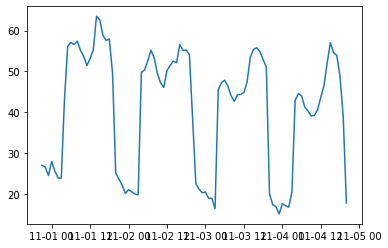

In [ ]:
plt.plot(df['Date'][:100],df['NO2'][:100])
plt.show()

In [ ]:
original_data = np.array(df['NO2'])
width = 25
rolled_data = np.array([original_data[i:i+width].mean() for i in range(len(original_data)-width)])

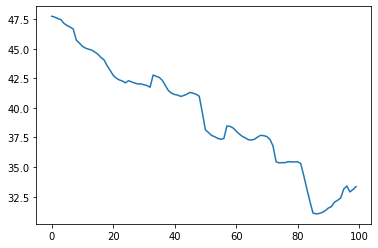

In [ ]:
plt.plot([i for i in range(len(rolled_data))][0:100],rolled_data[0:100])

In [ ]:
data = np.array(rolled_data)
data = data[:2500]
n_inputs=10
data_final = data[:-n_inputs]
for i in range(1,n_inputs):
  data_final = np.column_stack([data_final, data[i:-n_inputs+i]])
data_m = data_final.mean()
data_s = data_final.std()
unnorm_data = data_final
data_final = (data_final-data_m)/data_s

In [ ]:
data_final.shape

(2490, 10)

In [ ]:
x = data_final[:-1]
y = data_final.T[0].T[1:]

In [ ]:
x.shape, y.shape

((2489, 10), (2489,))

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = [10], verbose=True)

In [ ]:
model.fit(x,y)

Iteration 1, loss = 0.53625556
Iteration 2, loss = 0.36503000
Iteration 3, loss = 0.26746420
Iteration 4, loss = 0.20349331
Iteration 5, loss = 0.15285763
Iteration 6, loss = 0.11390445
Iteration 7, loss = 0.08574200
Iteration 8, loss = 0.06754229
Iteration 9, loss = 0.05633078
Iteration 10, loss = 0.04955416
Iteration 11, loss = 0.04456755
Iteration 12, loss = 0.04025452
Iteration 13, loss = 0.03630806
Iteration 14, loss = 0.03266838
Iteration 15, loss = 0.02913169
Iteration 16, loss = 0.02577477
Iteration 17, loss = 0.02272254
Iteration 18, loss = 0.01992114
Iteration 19, loss = 0.01760785
Iteration 20, loss = 0.01556854
Iteration 21, loss = 0.01382942
Iteration 22, loss = 0.01229773
Iteration 23, loss = 0.01100066
Iteration 24, loss = 0.00988838
Iteration 25, loss = 0.00892415
Iteration 26, loss = 0.00810042
Iteration 27, loss = 0.00741266
Iteration 28, loss = 0.00682216
Iteration 29, loss = 0.00631726
Iteration 30, loss = 0.00591173
Iteration 31, loss = 0.00556741
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [ ]:
((model.predict(x)-y)**2).mean()

0.006654901286672076

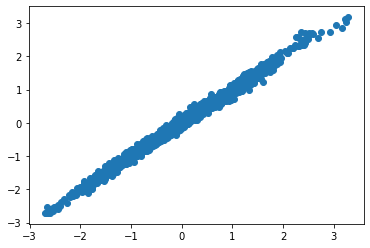

In [ ]:
plt.scatter(model.predict(x),y)

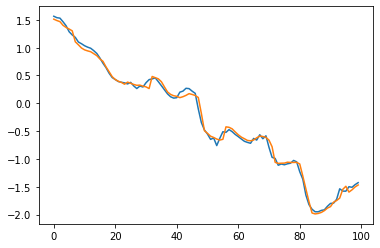

In [ ]:
plt.plot([i for i in range(100)], model.predict(x[:100]))
plt.plot([i for i in range(100)], y[:100])

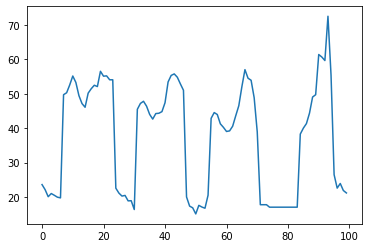

In [ ]:
plt.plot(original_data[26:126])

In [ ]:
y_real = y*data_s+data_m
y_pred = model.predict(x)*data_s+data_m
#y_real = 25*(y_real[1:]-y_real[:-1])[:100]+original_data[:len(y_real)-1][1:101]

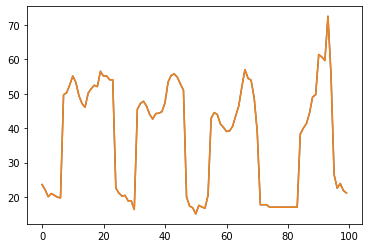

In [ ]:
plt.plot(25*(y_real[1:]-y_real[:-1])[:100]+original_data[:len(y_real)-1][1:101])
#plt.plot(25*(y_pred[1:]-y_pred[:-1])[:100]+original_data[:len(y_real)-1][1:101])
plt.plot(original_data[:len(y_real)-1][26:126])

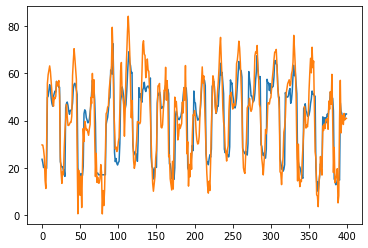

In [ ]:
plt.plot(25*(y_real[1:]-y_real[:-1])[:400]+original_data[:len(y_real)-1][1:401])
plt.plot(25*(y_pred[1:]-y_real[:-1])[:400]+original_data[:len(y_real)-1][1:401])
#plt.plot(25*(y_pred[1:]-y_pred[:-1])[:400]+original_data[:len(y_real)-1][1:401])
#plt.plot(original_data[:len(y_real)-1][26:126])

##Correlation between pollutants

In [ ]:
pd.set_option('display.max_columns', 30)

            norm_CO  norm_NO2  norm_SO2   norm_O3  norm_PM10  norm_PM25
norm_CO    1.000000  0.727477 -0.212058 -0.502767   0.919418   0.909774
norm_NO2   0.727477  1.000000 -0.144109 -0.265745   0.709070   0.640940
norm_SO2  -0.212058 -0.144109  1.000000  0.672325  -0.098027  -0.235939
norm_O3   -0.502767 -0.265745  0.672325  1.000000  -0.374829  -0.509625
norm_PM10  0.919418  0.709070 -0.098027 -0.374829   1.000000   0.964347
norm_PM25  0.909774  0.640940 -0.235939 -0.509625   0.964347   1.000000


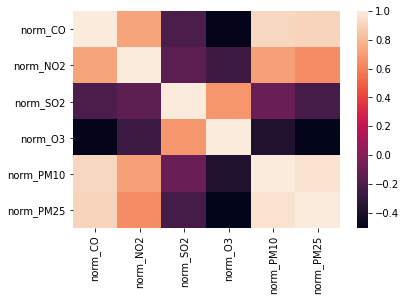

In [65]:
print(df[['norm_CO','norm_NO2','norm_SO2','norm_O3','norm_PM10','norm_PM25']].corr(method='pearson'))
ax=sns.heatmap(df[['norm_CO','norm_NO2','norm_SO2','norm_O3','norm_PM10','norm_PM25']].corr(method='pearson')) 

##Autocorrelation

In [ ]:
smooth=df[['Date','smooth_CO','smooth_NO2','smooth_SO2','smooth_O3','smooth_PM10','smooth_PM25']]
print(smooth)

                     Date  smooth_CO  smooth_NO2  smooth_SO2  smooth_O3  \
0     2019-10-31 21:00:00        NaN         NaN         NaN        NaN   
1     2019-10-31 22:00:00        NaN         NaN         NaN        NaN   
2     2019-10-31 23:00:00        NaN         NaN         NaN        NaN   
3     2019-11-01 00:00:00        NaN         NaN         NaN        NaN   
4     2019-11-01 01:00:00        NaN         NaN         NaN        NaN   
...                   ...        ...         ...         ...        ...   
2782  2020-03-01 22:00:00  1099.2392     42.8660      3.9404    13.6536   
2783  2020-03-01 23:00:00  1122.4288     43.2264      3.9952    13.6168   
2784  2020-03-02 00:00:00  1150.1336     43.8392      4.0836    13.6460   
2785  2020-03-02 01:00:00  1169.1556     44.3132      4.1280    13.5304   
2786  2020-03-02 02:00:00  1179.5536     44.3776      4.1716    13.6864   

      smooth_PM10  smooth_PM25  
0             NaN          NaN  
1             NaN          NaN  


In [ ]:
smooth=smooth.iloc[24:]

In [ ]:
print(smooth)

                     Date  smooth_CO  smooth_NO2  smooth_SO2  smooth_O3  \
24    2019-11-01 19:00:00  1687.1492     47.7380      4.8092    10.4192   
25    2019-11-01 20:00:00  1679.2132     47.6628      4.8592    10.3860   
26    2019-11-01 21:00:00  1676.3732     47.5448      4.8992    10.3260   
27    2019-11-01 22:00:00  1674.7240     47.4512      4.9220    10.4040   
28    2019-11-01 23:00:00  1650.3552     47.1376      4.9272    10.4472   
...                   ...        ...         ...         ...        ...   
2782  2020-03-01 22:00:00  1099.2392     42.8660      3.9404    13.6536   
2783  2020-03-01 23:00:00  1122.4288     43.2264      3.9952    13.6168   
2784  2020-03-02 00:00:00  1150.1336     43.8392      4.0836    13.6460   
2785  2020-03-02 01:00:00  1169.1556     44.3132      4.1280    13.5304   
2786  2020-03-02 02:00:00  1179.5536     44.3776      4.1716    13.6864   

      smooth_PM10  smooth_PM25  
24       540.9198     326.5594  
25       532.3758     318.6642  


In [ ]:
smooth.reset_index(drop=True,inplace=True)
print(smooth)

                     Date  smooth_CO  smooth_NO2  smooth_SO2  smooth_O3  \
0     2019-11-01 19:00:00  1687.1492     47.7380      4.8092    10.4192   
1     2019-11-01 20:00:00  1679.2132     47.6628      4.8592    10.3860   
2     2019-11-01 21:00:00  1676.3732     47.5448      4.8992    10.3260   
3     2019-11-01 22:00:00  1674.7240     47.4512      4.9220    10.4040   
4     2019-11-01 23:00:00  1650.3552     47.1376      4.9272    10.4472   
...                   ...        ...         ...         ...        ...   
2758  2020-03-01 22:00:00  1099.2392     42.8660      3.9404    13.6536   
2759  2020-03-01 23:00:00  1122.4288     43.2264      3.9952    13.6168   
2760  2020-03-02 00:00:00  1150.1336     43.8392      4.0836    13.6460   
2761  2020-03-02 01:00:00  1169.1556     44.3132      4.1280    13.5304   
2762  2020-03-02 02:00:00  1179.5536     44.3776      4.1716    13.6864   

      smooth_PM10  smooth_PM25  
0        540.9198     326.5594  
1        532.3758     318.6642  


In [70]:
df['norm_CO'].iloc[29:]

29      1.179494
30      1.167365
31      1.144056
32      1.125183
33      1.084227
          ...   
3962   -1.447004
3963   -1.422276
3964   -1.398496
3965   -1.419174
3966   -1.427884
Name: norm_CO, Length: 3938, dtype: float64

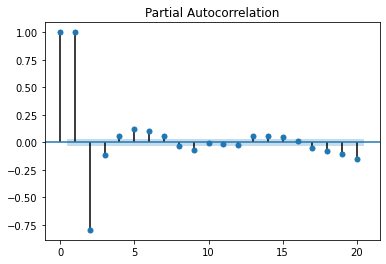

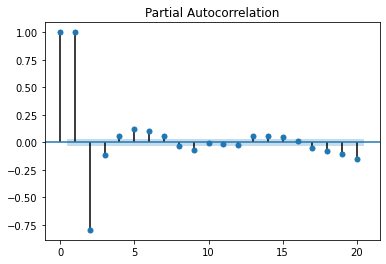

In [77]:
plot_pacf(df['norm_CO'].iloc[29:],lags=20)

###Train Test Split

In [ ]:
so2_m = smooth['smooth_SO2'].mean()
so2_s = smooth['smooth_SO2'].std()
smooth['smooth_SO2'] = (smooth['smooth_SO2']-so2_m)/so2_s

In [ ]:
rows=smooth.shape[0]
train=smooth[0:rows-168]
test=smooth[rows-168:rows]
print(train)
print(test)

                     Date  smooth_CO  smooth_NO2  smooth_SO2  smooth_O3  \
0     2019-11-01 19:00:00  1687.1492     47.7380    1.189265   10.41920   
1     2019-11-01 20:00:00  1679.2132     47.6628    1.258557   10.38600   
2     2019-11-01 21:00:00  1676.3732     47.5448    1.313992   10.32600   
3     2019-11-01 22:00:00  1674.7240     47.4512    1.345589   10.40400   
4     2019-11-01 23:00:00  1650.3552     47.1376    1.352796   10.44720   
...                   ...        ...         ...         ...        ...   
2590  2020-02-23 21:00:00  1196.8580     48.2080    0.113284   14.73865   
2591  2020-02-23 22:00:00  1210.5992     46.3144   -0.014769   14.35585   
2592  2020-02-23 23:00:00  1237.2452     44.5448   -0.104018   13.93145   
2593  2020-02-24 00:00:00  1270.1204     43.2280   -0.094040   13.05585   
2594  2020-02-24 01:00:00  1308.8988     41.9744   -0.055790   12.08585   

      smooth_PM10  smooth_PM25  
0        540.9198     326.5594  
1        532.3758     318.6642  


##Model Fitting

In [ ]:
x=[]
y=[]

In [ ]:
for i in range(0,2575):
  temp=[]
  for j in range(0,20):
    temp.append(train.at[i+j,'smooth_SO2'])
  y.append(train.at[i+20,'smooth_SO2'])
  x.append(temp)

In [ ]:
for i,j in zip(x,y):
  print(i,j)

[1.1892645933433983, 1.2585574915560558, 1.313991810126182, 1.345589371711154, 1.3527958331252696, 1.4281865063806416, 1.476968706722352, 1.503022836450311, 1.5168814160928434, 1.5246422206926602, 1.529631309363971, 1.5678809891773589, 1.5534680663491252, 1.5551310959062288, 1.552913723163424, 1.545707261749307, 1.603358953062238, 1.6321847987187041, 1.671543164903492, 1.6410542896899234] 1.5922720893482116
[1.2585574915560558, 1.313991810126182, 1.345589371711154, 1.3527958331252696, 1.4281865063806416, 1.476968706722352, 1.503022836450311, 1.5168814160928434, 1.5246422206926602, 1.529631309363971, 1.5678809891773589, 1.5534680663491252, 1.5551310959062288, 1.552913723163424, 1.545707261749307, 1.603358953062238, 1.6321847987187041, 1.671543164903492, 1.6410542896899234, 1.5922720893482116] 1.5556854390919288
[1.313991810126182, 1.345589371711154, 1.3527958331252696, 1.4281865063806416, 1.476968706722352, 1.503022836450311, 1.5168814160928434, 1.5246422206926602, 1.529631309363971, 1.

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = [30], verbose=True)

In [ ]:
model.fit(x,y)

Iteration 1, loss = 0.25766257
Iteration 2, loss = 0.05669089
Iteration 3, loss = 0.03788466
Iteration 4, loss = 0.02398441
Iteration 5, loss = 0.01721229
Iteration 6, loss = 0.01332716
Iteration 7, loss = 0.01123778
Iteration 8, loss = 0.00985737
Iteration 9, loss = 0.00890624
Iteration 10, loss = 0.00827991
Iteration 11, loss = 0.00778379
Iteration 12, loss = 0.00738322
Iteration 13, loss = 0.00707866
Iteration 14, loss = 0.00675633
Iteration 15, loss = 0.00649751
Iteration 16, loss = 0.00625678
Iteration 17, loss = 0.00603814
Iteration 18, loss = 0.00580624
Iteration 19, loss = 0.00557942
Iteration 20, loss = 0.00543722
Iteration 21, loss = 0.00521030
Iteration 22, loss = 0.00502530
Iteration 23, loss = 0.00484627
Iteration 24, loss = 0.00466424
Iteration 25, loss = 0.00448065
Iteration 26, loss = 0.00433852
Iteration 27, loss = 0.00422411
Iteration 28, loss = 0.00408214
Iteration 29, loss = 0.00400612
Iteration 30, loss = 0.00391706
Iteration 31, loss = 0.00381379
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[30], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [ ]:
((model.predict(x)-y)**2).mean()**0.5

0.07356873296708538

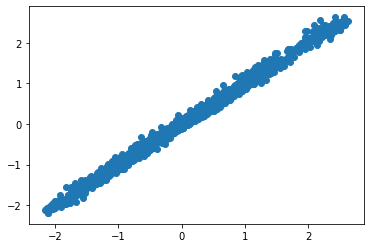

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(x),y)

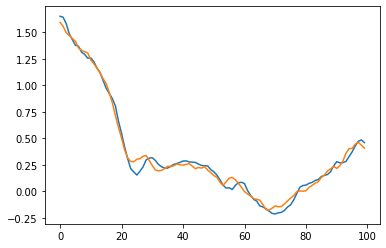

In [ ]:
plt.plot([i for i in range(100)], model.predict(x[:100]))
plt.plot([i for i in range(100)], y[:100])

In [ ]:
x_test=[]
y_test=[]

In [ ]:
for i in range(2595,2742):
  temp=[]
  for j in range(0,20):
    temp.append(test.at[i+j,'smooth_SO2'])
  y_test.append(test.at[i+20,'smooth_SO2'])
  x_test.append(temp)

In [ ]:
for i,j in zip(x_test,y_test):
  print(i,j)

[-0.015323149185442963, 0.030132992042061005, 0.1504254633392344, 0.2884569165788493, 0.3444455783346755, 0.3613530454985639, 0.4899606645812572, 0.6080357631356251, 0.6465626145418629, 0.7108664240832083, 0.7457900447823876, 0.8272784930804726, 0.9445220768562895, 1.0803361573530983, 1.2222480128926216, 1.359170779760833, 1.3780184480746773, 1.3852249094887943, 1.3785727912603787, 1.3358883659613825] 1.3514099751610174
[0.030132992042061005, 0.1504254633392344, 0.2884569165788493, 0.3444455783346755, 0.3613530454985639, 0.4899606645812572, 0.6080357631356251, 0.6465626145418629, 0.7108664240832083, 0.7457900447823876, 0.8272784930804726, 0.9445220768562895, 1.0803361573530983, 1.2222480128926216, 1.359170779760833, 1.3780184480746773, 1.3852249094887943, 1.3785727912603787, 1.3358883659613825, 1.3514099751610174] 1.4173768142594676
[0.1504254633392344, 0.2884569165788493, 0.3444455783346755, 0.3613530454985639, 0.4899606645812572, 0.6080357631356251, 0.6465626145418629, 0.710866424083

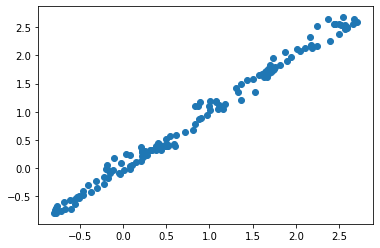

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(x_test),y_test)

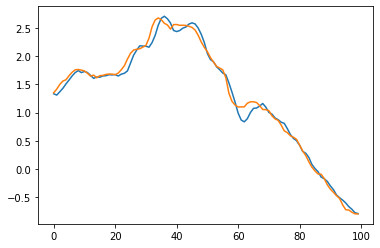

In [ ]:
plt.plot([i for i in range(100)], model.predict(x_test[:100]))
plt.plot([i for i in range(100)], y_test[:100])

In [ ]:
svr_rbf=SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
output=[]

In [ ]:
for i in range(2362,2594):
  output.append([train.at[i,'smooth_SO2']])

print(output)

[[5.7316375000000015], [5.750037500000001], [5.713537500000001], [5.656487500000002]]


In [ ]:
for i in range(0,168):
  temp=[]
  for j in range(0,150):
    temp.append(output[i+j][0])
  output.append(svr_rbf.predict([temp]).tolist())

ValueError: ignored

In [ ]:
print(output)

In [ ]:
del output[:4]
print(output)

In [ ]:
plt.figure(figsize=(32,8))
plt.plot(test['Date'],test['smooth_SO2'],label='SO2')
plt.plot(test['Date'],output,label='SO2')
plt.legend()